<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ExergyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Exergy analysis
#@markdown Exergy analysis is a thermodynamic analysis technique based on the second law of thermodynamics which provides an alternative and illuminating means of assessing and comparing processes and systems rationally and meaningfully.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim

#Exergy analysis
Exergy analysis is a thermodynamic tool used to evaluate and optimize energy conversion systems. It is based on the concept of exergy, which is the maximum useful work that can be obtained from a system as it comes into equilibrium with its environment.

Exergy analysis involves analyzing the inputs and outputs of a system to determine the amount of exergy that is being destroyed or lost. This analysis can help identify the sources of inefficiencies in the system and identify opportunities for optimization.

The exergy of a system can be calculated using the following equation:

Exergy = (available energy) - (energy lost to the environment)

Available energy refers to the energy that can be converted into useful work, while energy lost to the environment refers to energy that is dissipated as waste heat. The exergy analysis provides information about the system's energy efficiency, the amount of energy waste, and the opportunities for improving system performance.

Exergy analysis is commonly used in the design and optimization of energy conversion systems such as power plants, engines, and refrigeration systems. It can also be applied to the analysis of industrial processes to identify areas of inefficiency and to develop strategies for improving process efficiency.

Overall, exergy analysis is a powerf

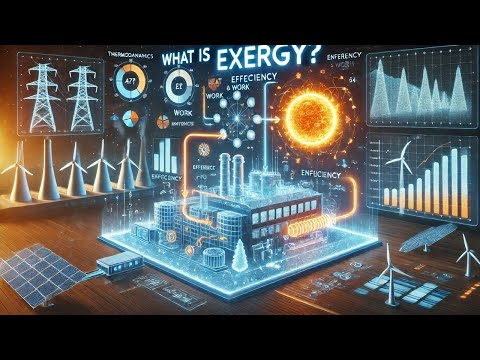

In [2]:
#@title  Exergy Analysis:
#@markdown integrating the 1st and 2nd laws of thermodynamics. https://www.youtube.com/watch?v=cD3nFnzviqA
from IPython.display import YouTubeVideo
YouTubeVideo('cD3nFnzviqA', width=600, height=400)


# Exergy
In thermodynamics, the exergy of a system is the maximum useful work possible during a process that brings the system into equilibrium with a heat reservoir, reaching maximum entropy. When the surroundings are the reservoir, exergy is the potential of a system to cause a change as it achieves equilibrium with its environment. Exergy is the energy that is available to be used. After the system and surroundings reach equilibrium, the exergy is zero. Determining exergy was also the first goal of thermodynamics.

Energy is neither created nor destroyed during a process. Energy changes from one form to another (see First Law of Thermodynamics). In contrast, exergy is always destroyed when a process is irreversible, for example loss of heat to the environment (see Second Law of Thermodynamics). This destruction is proportional to the entropy increase of the system together with its surroundings (see Entropy production). The destroyed exergy has been called anergy. For an isothermal process, exergy and energy are interchangeable terms, and there is no anergy.

https://en.wikipedia.org/wiki/Exergy

#Example of Exergy Calculation using NeqSim
THe exergy of a stream can be directly calculated in neasim. THe Exergy is defined as

$e_x=(h_1 - h_0) - T_0(s_1-s_o)  $

Where $T_0$ is the temperature of the surroundings.

http://www.ivt.ntnu.no/ept/fag/tep4120/innhold/Exergy%20Light%20Version%203.pdf

In [3]:
import neqsim
from neqsim.thermo.thermoTools import *

Tsurr = 20.0+273.15 # surrounding temperature in Kelvin

Tgas = 50.0
P_in = 20.0
P_out = 10.0

fluid_1 = fluid("srk")
fluid_1.addComponent("methane", 1.0, "kg/sec")
fluid_1.addComponent("ethane", 0.10, "kg/sec")
fluid_1.setTemperature(Tgas, "C")
fluid_1.setPressure(P_in, "bara")
TPflash(fluid_1)
T1 = fluid_1.getTemperature("C")
H1 = fluid_1.getEnthalpy("kJ/kg")
U1 = fluid_1.getInternalEnergy("kJ/kg")
S1 = fluid_1.getEntropy("kJ/kgK")
V1 = fluid_1.getVolume("m3")
E1 = fluid_1.getExergy(Tsurr, "kJ/kg")


#simulating a throtling process - an isenthalpic process
fluid_1.setPressure(P_out)
PHflash(fluid_1, E1, "kJ/kg")

T2 = fluid_1.getTemperature("C")
H2 = fluid_1.getEnthalpy("kJ/kg")
U2 = fluid_1.getInternalEnergy("kJ/kg")
S2 = fluid_1.getEntropy("kJ/kgK")
V2 = fluid_1.getVolume("m3")
E2 = fluid_1.getExergy(Tsurr, "kJ/kg")


#Reduction in exergy

redEx = E1-E2

print("Reduction in exergy in valve is ", redEx, " kJ/kg")


#In an adiabatic expander we will take out work at constant entropy

PSflash(fluid_1, S1, "kJ/kgK")

T3 = fluid_1.getTemperature("C")
H3 = fluid_1.getEnthalpy("kJ/kg")
U3 = fluid_1.getInternalEnergy("kJ/kg")
S3 = fluid_1.getEntropy("kJ/kgK")
V3 = fluid_1.getVolume("m3")
E3 = fluid_1.getExergy(Tsurr, "kJ/kg")

#THe work done will be
work = H1-H3
print("expander work ", work, " kJ/kg")
#change in exergi is
exChange = E1-E3

print("reduced exergy ",  exChange, " kJ/kg")

Reduction in exergy in valve is  28.102825381948378  kJ/kg
expander work  99.94818725784688  kJ/kg
reduced exergy  99.94818725784705  kJ/kg
